# *Lecture 10*

# Interpolation

| |
|:---:|
|Selected Content [From **COMPUTATIONAL PHYSICS**, 3rd Ed, 2015](http://physics.oregonstate.edu/~rubin/Books/CPbook/index.html) <br>RH Landau, MJ Paez, and CC Bordeianu (deceased) <br>Copyrights: <br> [Wiley-VCH, Berlin;](http://www.wiley-vch.de/publish/en/books/ISBN3-527-41315-4/) and [Wiley & Sons, New York](http://www.wiley.com/WileyCDA/WileyTitle/productCd-3527413154.html)<br>  R Landau, Oregon State Unv, <br>MJ Paez, Univ Antioquia,<br> C Bordeianu, Univ Bucharest, 2015.<br> Support by National Science Foundation.|

## Follow-up on energy levels in finite square well

Let's return to the energy levels in our finite 1-D square well.
Vary $V_0$ and check the energy solution(s) $E$ as a function of $V_0$.
* Does it match your expectation?
* Which $n$ values are represented?
* Make $V_0$ very large.  Do the results match your expectations?
* Do you find any limitations to the methods?

We assume the energies $E$ and $-V_0$ are all negative; our plot shows $|E|$ instead of $E$.

Let's calculate values for a very deep well and compare the results to expectations for the "infinite square well."

C:\Users\palec\AppData\Local\Temp/ipykernel_20856/1511090524.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(E)/np.tan(np.sqrt(V-E)) - np.sqrt(V-E)


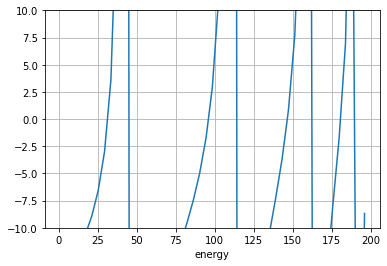

iteration  0: x = 32.500000 and f(x) =  1.506493
iteration  1: x = 28.750000 and f(x) = -3.718925
iteration  2: x = 30.625000 and f(x) = -1.500761
iteration  3: x = 31.562500 and f(x) = -0.121906
iteration  4: x = 32.031250 and f(x) =  0.656767
iteration  5: x = 31.796875 and f(x) =  0.259153
iteration  6: x = 31.679688 and f(x) =  0.066623
iteration  7: x = 31.621094 and f(x) = -0.028133
iteration  8: x = 31.650391 and f(x) =  0.019121
iteration  9: x = 31.635742 and f(x) = -0.004537
iteration 10: x = 31.643066 and f(x) =  0.007284
iteration 11: x = 31.639404 and f(x) =  0.001372
iteration 12: x = 31.637573 and f(x) = -0.001583
iteration 13: x = 31.638489 and f(x) = -0.000106
iteration 14: x = 31.638947 and f(x) =  0.000633
iteration 15: x = 31.638718 and f(x) =  0.000264
iteration 16: x = 31.638603 and f(x) =  0.000079
iteration 17: x = 31.638546 and f(x) = -0.000013
root found with precision eps =  0.0001
iteration  0: x = 75.000000 and f(x) = -12.798917
iteration  1: x = 87.500000 

180.6726837158203

In [3]:
import numpy as np
import matplotlib.pyplot as plt
def f(V, E):
    return np.sqrt(V-E)*np.tan(np.sqrt(V-E)) - np.sqrt(E)

def g(V, E):
    return np.sqrt(E)/np.tan(np.sqrt(V-E)) - np.sqrt(V-E)

V = 200. # vary this number to see effects on energy levels
E_values = []
g_values = []
for E in np.linspace(1, V, 50):
    E_values.append(E)
    g_values.append(g(V, E))
plt.plot(E_values, g_values)
plt.ylim(-10.,10.)
plt.xlabel('energy')
plt.grid()
plt.show()

def bisection2(xminus, xplus, Nmax, eps):       # x-,x+ Nmax error
    for it in range(0,Nmax):
        x=(xminus+xplus)/2                     # Mid point
        print("iteration %2d: x = %.6f and f(x) = %9.6f" % (it, x, g(V,x)))
        if (g(V, xplus)*g(V, x))>0:                      # Root in other half
            xplus=x                            # Change x+ to x
        else:
            xminus=x                           # Change x- to x
        if(xplus-xminus<eps):                           # Converged?
            print("root found with precision eps = ",eps)
            break
        if it==Nmax-1:
             print("root not found after Nmax iterations ")   
    return x  

bisection2(25, 40, 20, 1e-04)
bisection2(50, 100, 20, 1e-04)
bisection2(100, 150, 20, 1e-04)
bisection2(150, 190, 20, 1e-04)

### Comparison with theory

With our notation for $E$ and $V_0$, we can write the usual infinite square well energies as 
$$ -\left| E_n \right| - V_0 = n^2 \pi^2$$
because $2m = \hbar = a = 1$.

In [4]:
print("For the finite square well with V=", -V)
for En in (31.638546, 96.145535, 146.553707, 180.672684):
    print("E_n = ", -En, " and n=", np.sqrt((V-En)/pow(np.pi,2)))

For the finite square well with V= -200.0
E_n =  -31.638546  and n= 4.130203602611499
E_n =  -96.145535  and n= 3.2438645656595684
E_n =  -146.553707  and n= 2.3270671816806647
E_n =  -180.672684  and n= 1.399380767964707


We don't get exactly the integer values of n, but you do get closer and closer when the magnitude of $V$ is increased.

Try $V=500$ and calculate those $n$ values. What do you find? Are the $n$ values closer to integer values?

## Physics Application: Interpolation of Cross Sections

This table gives experimental values for a scattering cross section ($f(E)$
in the theory), each with absolute error $\pm\sigma_i$, as a function of
energy ($x_i$ in the theory).

|$i=$ | 1|2|3|4|5|6|7|8|9|
|- - -|- - -|- - -|- - -|- - -|- - -|- - -|- - -|- - -|- - -|
|$E_i$ (MeV) |0|25|50|75|100|125|150|175|200|
| $g(E_i)$(mb)|10.6|16.0|45.0|83.5|52.8|19.9|10.8|8.25|4.7|
| Error (mb)|9.34|17.9 |41.5 |85.5|51.5|21.5|10.8 |6.29 |4.14|

When we interpolate data, we simply want to know the value of $f(x)$ at some point between the given $x$ values, regardless of the error on each value.
We call
the independent variable $x$ and its tabulated values
$x_i (i= 1,2, \ldots)$, and we assume that the dependent variable is the
function $g(x)$, with tabulated values $g_i = g(x_i)$. 

### Lagrange Polynomial Global Interpolation
Given $N$ data points, we will assume that $g(x)$ can be approximated as a $(N-1)$-degree polynomial over the entire interval.
Why is this at all reasonable?

Now consider the expansion of a function at two points $x_1$ and $x_2$.  We would like to express the values of the function at those points in terms of the function and derivative at another point $x$.  The reason for this approach is that we already know the values $f(x_1)$ and $f(x_2)$; we want to find $f(x)$ and $f'(x)$ for other $x$.
$$\begin{align}
f(x_1) &= f(x) + (x_1 - x) f'(x) + \cdots \\
f(x_2) &= f(x) + (x_2 - x) f'(x) + \cdots
\end{align}$$

For the purposes of interpolation and fitting, we would like to *approximate* the true function with an approximate polynomial function $p(x)$.  Because this $p(x)$ is a new function, we can define it in such a way that it satisfies the equality, without approximation.
$$\begin{align}
f(x_1) &= p(x) + (x_1 - x) p'(x) \\
f(x_2) &= p(x) + (x_2 - x) p'(x)
\end{align}$$

These equations are two equations in two unknowns ($p$ and $p'$), with solution

$$
p(x) = \frac{x-x_2}{x_1-x_2} f(x_1) + \frac{x-x_1}{x_2-x_1} f(x_2)
$$

If you look closely, you'll realize that this is the equation for a line through the points $(x_1, f(x_1))$ and $(x_2, f(x_2))$.
It corresponds to the assumption that the function $f$ can be approximated as a straight line in the interval $[x_1, x_2]$.
The statement might be, "For $N=2$ points, the function can be approximated as a polynomial of order $N-1=1$."

To extend this idea to higher orders, we add more terms in the series expansion.  Each additional term brings a new equation and the possibility to solve for a new higher-order derivative.  For example, the equations

$$\begin{align}
f(x_1) &= p(x) + (x_1 - x) p'(x) + \frac{(x_1 -x )^2}{2} p''(x) \cdots \\
f(x_2) &= p(x) + (x_2 - x) p'(x) + \frac{(x_2 -x )^2}{2} p''(x) \cdots \\
f(x_3) &= p(x) + (x_3 - x) p'(x) + \frac{(x_3 -x )^2}{2} p''(x) \cdots
\end{align}$$

yield the solution

$$
p(x) = \frac{(x-x_2)(x-x_3)}{(x_1-x_2)(x_1-x_3)}\ f(x_1) + \frac{(x-x_1)(x-x_3)}{(x_2-x_1)(x_2-x_3)}\ f(x_2) + \frac{(x-x_1)(x-x_2)}{(x_3-x_1)(x_3-x_2)}\ f(x_3)
$$

This is the unique quadratic polynomial that passes through all three points.

The general formula for the Lagrange polynomial of order $N-1$ is:

$$\begin{align}
g(x) &\simeq  g_{1}\lambda_{1}(x) + g_{2}\lambda_{2}(x) + \cdots +
g_{n}\lambda_{n}(x),\\
\lambda_{i}(x) & =  \prod_{j (\neq i)=1}^{n}
\frac{x-x_{j}}{x_{i}-x_{j}} = \frac{x-x_1} { x_i-x_1} \frac{x-x_2}
{ x_i-x_2} \cdots \frac{x-x_n} { x_i-x_n}
\end{align}$$

Remember that the coefficients $g_i$ are the tabulated (known) values $g(x_i)$ for specific points $x_i$.

Let's try an example now, with real numbers.

Assume we are given the points and function values

$$x_{1-4}  = (0 ,1 ,2, 4) \qquad  g_{1-4}  =(-12,-12,-24,-60)$$

With four points, the Lagrange formula determines a third-order
polynomial that reproduces each of the tabulated values:

$$\begin{align}
g(x) &=  \frac{(x-1)(x-2)(x-4)}{(0-1)(0-2)(0-4)}(-12) +
\frac{x(x-2)(x-4)}{(1-0)(1-2)(1-4)}(-12)  \\
&+ \frac{x(x-1)(x-4)}{(2-0)(2-1)(2-4)}(-24) +
\frac{x(x-1)(x-2)}{(4-0)(4-1)(4-2)}(-60),  \\
\Rightarrow \quad g(x) &=  x^{3} - 9x^{2} + 8x -12
\end{align}$$

Keep in mind that the polynomial is only guaranteed to pass through the given points; its behavior everywhere else may be erratic.
For an example, see the 8th-order polynomial function fit to the 9 points in the figure.

<img src="Figures/Figure_7.5.png" width="60%">


### Natural Cubic Spline Local Interpolation

A sophisticated variation of an $n=4$ interpolation, known as *cubic
splines*, often leads to surprisingly eye-pleasing fits. In this
approach, cubic polynomials are fit to the function ** separately in each local
interval**, with the additional constraint that the first and second
derivatives of the polynomials be continuous from one interval to the
next. This continuity of slope and curvature is what makes the spline
fit particularly pleasing to the eye.

The series of cubic polynomials obtained by spline-fitting a table of
data can be integrated and differentiated and is guaranteed to have
well-behaved derivatives. The existence of meaningful derivatives is an
important consideration. As a case in point, if the interpolated
function is a potential, you can take the derivative to obtain the
force.
It is not easy to solve the equations and satisfy the matching conditions simultaneously, unless you have a computer!

The basic form of the cubic spline is

$$
g_{i}(x) =  g_{i} +g_i^\prime (x-x_{i})
+\frac{1}{2} g_{i}^{\prime\prime}(x-x_{i})^{2}
+\frac{1}{6}g_{i}^{\prime\prime\prime}(x-x_{i})^{3}
$$ 

but then additional conditions are needed to ensure continuity of the function and of the first and second derivatives.  

The matching of the first *and* second derivatives at each interval’s
boundaries provides the equations

$$
g_{i-1}^\prime (x_{i}) = g_i^\prime(x_{i}), \quad g_{i-1}^{\prime\prime}(x_{i}) =
g_{i}^{\prime\prime}(x_{i})
$$

The additional equations needed to determine all constants is obtained
by matching the third derivatives at adjacent nodes. Values for the
third derivatives are found by approximating them in terms of the second
derivatives:

$$
g_{i}''' \simeq \frac{g_{i+1}'' - g_{i}''}{x_{i+1} - x_{i}}
$$

Even these constraints are not enough to solve for all of the unknowns: the matching at the boundaries provides only $N-2$ equations for $N$ unknowns.
The remaining constraints come from boundary conditions at the edge of the interval.
For the "natural" spline, the boundary conditions are chosen to be:

$$g''(a) = g''(b) = 0$$

(They were already required to be equal; in this case they are required to be 0.)

### Implementation

The implementation below follows a more efficient but less transparent algorithm, based on the algorithms in the *Numerical Recipes* chapter, "Interpolation and Extrapolation."  You are free to adapt this code for any fitting problems.

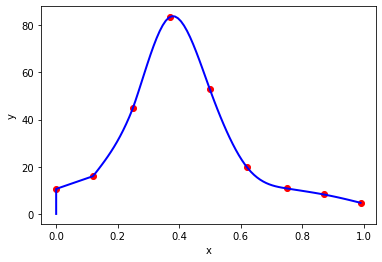

In [7]:
# Cubic Spline Interpolation
# Adapted from Landau et al.

import numpy as np
import matplotlib.pyplot as plt

x = np.array([0., 0.12, 0.25, 0.37, 0.5, 0.62, 0.75, 0.87, 0.99])    # input
y = np.array([10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7])
n = 9 # number of data points
Nfit = 100 # number of evaluation points for plot

y2 = np.zeros((n), float)
u = np.zeros((n), float)

# output fit values
xout = np.zeros((Nfit+2), float)
yout = np.zeros((Nfit+2), float)

fig,ax = plt.subplots()
ax.plot(x, y, 'ro')

# Filling polynomial sequence for all n, with special case for n=1
yp1 = (y[1]-y[0])/(x[1]-x[0]) - (y[2]-y[1])/(x[2]-x[1]) + (y[2]-y[0])/(x[2]-x[0])
ypn = (y[n-1]-y[n-2])/(x[n-1]-x[n-2]) - (y[n-2]-y[n-3])/(x[n-2]-x[n-3]) + \
      (y[n-1]-y[n-3])/(x[n-1]-x[n-3])

# This block uses decomposition method to solve the tridiagonal system of N equations
for i in range(1, n - 1):
        sig = (x[i] - x[i - 1])/(x[i + 1] - x[i - 1]) 
        p = sig*y2[i - 1] + 2. 
        y2[i] = (sig - 1.)/p 
        u[i] = (y[i+1] - y[i])/(x[i+1] - x[i]) - (y[i] - y[i-1])/(x[i] - x[i-1]) 
        u[i] = (6.*u[i]/(x[i + 1] - x[i - 1]) - sig*u[i - 1])/p
        qn=0.5
        un=(3/(x[n-1]-x[n-2]))*(ypn-(y[n-1]-y[n-2])/(x[n-1]-x[n-2]))

y2[n - 1] = (un - qn*u[n - 2])/(qn*y2[n - 2] + 1.)

for k in range(n - 2, 1,  - 1):
        y2[k] = y2[k]*y2[k + 1] + u[k]

for i in range(1, Nfit + 2):            # initialization ends, begin fit
        xout[i] = x[0] + (x[n - 1] - x[0])*(i - 1)/(Nfit) 
        # Bisection algorithm to find the correct interval for this xout
        klo = 0;    khi = n - 1         
        while (khi - klo >1):
            k = (khi + klo) >> 1
            if (x[k] > xout[i]): 
                khi  = k
            else: 
                klo = k
        h = x[khi] - x[klo] 
        if (x[k] > xout[i]):  
            khi = k
        else: 
            klo = k 
        h = x[khi] - x[klo]
        a = (x[khi] - xout[i])/h 
        b = (xout[i] - x[klo])/h
        # This is the implementation of the spline itself
        yy = (a*y[klo]+b*y[khi] + ((a**3-a)*y2[klo] + 
                 (b**3-b)*y2[khi])*(h*h)/6.)
        yout[i]=yy
ax.plot(xout,yout,'b',lw=2)
plt.xlabel("x")
plt.ylabel("y")
plt.show()


## Python Implementations

For completeness, we provide the references to the corresponding SciPy routines.

### Root-Finding Routines

The simple Newton-Raphson method is implemented as `scipy.optimize.newton`.  See 
[scipy.optimize reference guide](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html)
This implementation requires a preliminary guess that is not too far away from the actual zero.

In [8]:
from scipy.optimize import newton
def y(x): # Test function, projectile motion
    g = 9.8
    v0 = 40.
    theta = 45. * np.pi/180.
    return np.tan(theta)*x - g/(2*pow(v0*np.cos(theta),2))*x*x

preliminary_guess = 120.
root = newton(y, preliminary_guess)
print(root)

163.26530612244895


But be careful!  These root-finding methods can get confused.  Plotting the function, if you can, is always a good check.  Other root finders in `scipy.optimize` are most robust and complicated.

6.108467017547629
18.36051985246666
6.108467017547629
18.36051985246672


C:\Users\palec\AppData\Local\Temp/ipykernel_20856/1082421133.py:3: RuntimeWarning: divide by zero encountered in true_divide
  return np.sqrt(E)/np.tan(np.sqrt(V-E)) - np.sqrt(V-E)


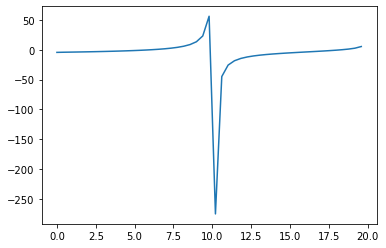

In [9]:
def g(E): # test function, finite square well
    V = 20
    return np.sqrt(E)/np.tan(np.sqrt(V-E)) - np.sqrt(V-E)

print(newton(g, 5.))
print(newton(g, 18.))
print(newton(g, 10.))
print(newton(g, 11.))

new_xvalues = np.linspace(0,20)
new_fvalues = g(new_xvalues)
plt.plot(new_xvalues, new_fvalues)
plt.show()

### Cubic Spline Fitting Routines

The cubic spline fitting routine is implemented as `scipy.interpolate.CubicSpline`.  See
[scipy.interpolate reference guide](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.CubicSpline.html) for more details and default values.

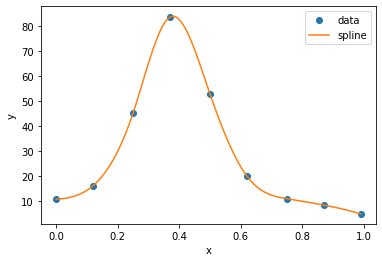

In [13]:
from scipy.interpolate import CubicSpline
x = np.array([0., 0.12, 0.25, 0.37, 0.5, 0.62, 0.75, 0.87, 0.99])
y = np.array([10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7])
cs = CubicSpline(x, y) # same table of tabulated values
plt.plot(x, y, 'o', label='data')
plt.plot(xout, cs(xout), label='spline')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Discussion of Term Project

One of the major assignments of the Computational Physics course is the term project. This project should use some of the advanced concepts from class to implement a new algorithm or apply numerical methods to a physics or astrophysics problem. The time required for the project should be about the same as a homework exercise set, but it is spread throughout the second half of the quarter.

The topic for the project can be anything -- deeper exploration of a topic we covered in the course, independent study of a textbook chapter that we did not cover, or application of numerical methods to your own physics research project. Some possibilities are collected in the list below.

* Research the development of unum as an alternative to the IEEE floating-point standard. How does it work, and why does it promise "the end of error?"
* Implement the use of quasi-random sequences in Monte Carlo integration. Is the convergence different from the convergence with pseudo-random sequences?
* Develop a Monte Carlo decay chain for a transuranic radioisotope decay chain. This should take into account different decay constants for each isotope, the next step in the decay chain, and keeping track of the different isotope populations on long and short timescales.
* Filtering noisy signals using digital filters (Landau et al., Chapter 12)
* Exploration of wavelet transforms and wavelet basis functions (Landau et al., Chapter 13)
* Analysis of the chaotic motion of a double pendulum (Landau et al., Chapter 15)
* Applications of the Verlet algorithm in molecular dynamics (Landau et al., Chapter 18)
* Investigation of heat flow using the leapfrog method (Landau et al., Chapter 20)
* Exploration of adaptive integration methods (adaptive quadrature)
* Investigation of allowed energy levels in the Kronig-Penney model (Kittel)
* Least-squares fit to data with polynomials and Chebyshev polynomials
* Time evolution of a quantum mechanical wave packet interacting with a potential step or a finite square well
* Classical scattering from a central potential (electrostatic or gravitational)
* Born cross section for quantum scattering from a central potential
* Calculation of electrostatic potential for systems with circular symmetry
* Calculation of electrostatic potential with adaptive mesh/grid

In order to plan ahead for the project well in advance, you will submit a "Term Project Proposal" this week outlining the proposed project and its connection to computational physics. The proposal should be 2-3 pages, including a bibliography of primary references (books or journal articles). The project report itself, submitted near the end of the quarter, will of course be much longer, probably 5-10 pages.

Please include the following information in your proposal:

* Introduction to the project. This includes a short broad summary of the problem or challenge and the proposed solution. The summary will be expanded in the subsequent sections of the proposal
* Background and motivation. This includes an explanation of why the problem is interesting, and why the solution is not trivial to calculate. What literature exists describing the proposed methods?  How is the proposed method expected to yield a reasonable result?
* Project summary. Give a short summary of what you hope to accomplish with this project. What will be the end result? How will you know if you have been successful?
* Project details. Describe the expected implementation, including any known methods. Are there any notable challenges to overcome?
* References. Even if the main reference is the textbook, please make an effort to track down some of the articles in the literature that focus on the topic. You should have 3-5 references at this stage.

Your proposal can include figures if they help to describe the project, but you are not expected to do a lot of coding work to produce those figures.

Please submit a PDF version of your proposal on Canvas. The grade for the proposal will be wrapped with the grade for the term project report, combining to form 15% of the course grade.